# 상관행렬 기반 히트맵 작성
- 관계가 통계적으로 유의한지 알 수 있는 몇 가지 검정(test) 참고
    - 피어슨, 스피어만, 켄달 등

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
covidtotals = pd.read_csv('./data/covidtotals.csv', parse_dates = ['lastdate'])

### 상관행렬 생성

In [6]:
corr = covidtotals.corr()
corr[['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.000000,0.932079,0.181851,0.247183
total_deaths,0.932079,1.000000,0.179440,0.394614
total_cases_pm,0.181851,0.179440,1.000000,0.586098
total_deaths_pm,0.247183,0.394614,0.586098,1.000000
population,0.270030,0.212619,-0.056564,-0.014291
pop_density,-0.028737,-0.031645,0.127174,0.040299
median_age,0.162698,0.205128,0.320626,0.395619
gdp_per_capita,0.186835,0.198729,0.662983,0.391254
hosp_beds,0.027601,0.019990,0.081449,0.120488


### 중위연령 및 1인당 국내총생산(GDP)에 대한 백만 명당 확진자별 산점도 그리기
- 서브플롯의 y축 공유를 위해 **sharey = True**

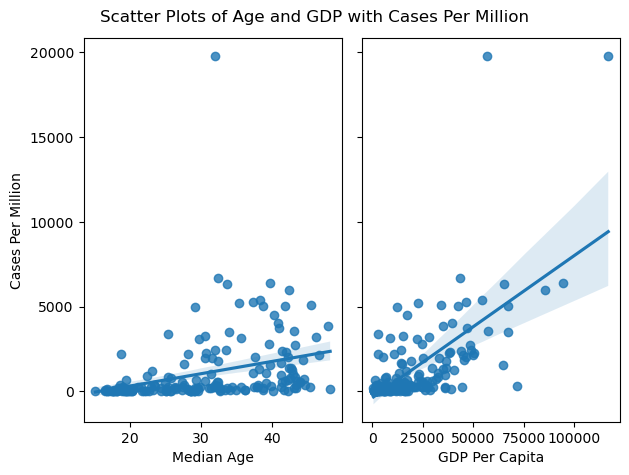

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.regplot(covidtotals.median_age, covidtotals.total_cases_pm, ax=axes[0])
sns.regplot(covidtotals.gdp_per_capita, covidtotals.total_cases_pm, ax=axes[1])
axes[0].set_xlabel('Median Age')
axes[0].set_ylabel('Cases Per Million')
axes[1].set_xlabel('GDP Per Capita')
axes[1].set_ylabel('')

plt.suptitle('Scatter Plots of Age and GDP with Cases Per Million')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

### 상관행렬의 히트맵

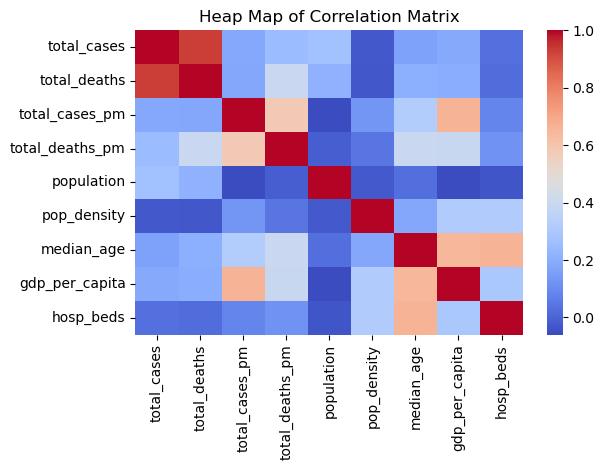

In [9]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.title('Heap Map of Correlation Matrix')
plt.tight_layout()
plt.show()

> 탐색적 분석이나 통계적 모델링을 할 때 상관행렬과 히트맵을 활용 <br>
> 이변걍 관계를 염두에 두면 데이터를 더 잘 이해할 수 있음!